In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from timeit import default_timer as timer
from datetime import datetime
import mysql.connector
import os

In [12]:
start1 = timer()                                               # workflow timer start
datetime1 = datetime.now().strftime('%Y-%m-%d %H:%M:%S')       # timestamp begin

In [13]:
df = pd.read_csv("df.csv", index_col='id')  # opening of the dataframe with setting the index in reference to the first column

In [14]:
br = df.loc[(df['neighbourhood_group'] == 'Brooklyn') & (df['room_type'] == 'Entire home/apt')]      #selection of conditions within the columns
mn = df.loc[(df['neighbourhood_group'] == 'Manhattan') & (df['room_type'] == 'Entire home/apt')]
qs = df.loc[(df['neighbourhood_group'] == 'Queens') & (df['room_type'] == 'Entire home/apt')]
bx = df.loc[(df['neighbourhood_group'] == 'Bronx') & (df['room_type'] == 'Entire home/apt')]
si = df.loc[(df['neighbourhood_group'] == 'Staten Island') & (df['room_type'] == 'Entire home/apt')]

In [15]:
br_meanprice = br.price.mean()          # calculation of the average price within the above conditions
mn_meanprice = mn.price.mean()
qs_meanprice = qs.price.mean()
bx_meanprice = bx.price.mean()
si_meanprice = si.price.mean()

In [16]:
print(br_meanprice, mn_meanprice, qs_meanprice, bx_meanprice, si_meanprice)

178.32754472225128 249.23910902341086 147.05057251908397 127.5065963060686 173.8465909090909


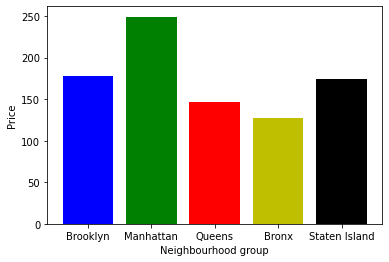

In [17]:
# diagram creation

Neigh = ['Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'Staten Island']
pr_mean = [br_meanprice, mn_meanprice, qs_meanprice, bx_meanprice, si_meanprice]
plt.bar(Neigh, pr_mean, color = ('b', 'g', 'r', 'y', 'black'))      # impostazione dell'istogramma
plt.xlabel('Neighbourhood group')
plt.ylabel('Price')
plt1 = plt.savefig('plt1.pdf')
plt.show()

In [18]:
filepath1 = os.path.abspath('Analysis_1')
dfpath = os.path.abspath('df')
img1 = os.path.abspath('plt1')

In [19]:
end1 = timer()
end1 = (end1 - start1)

In [20]:
mydb = mysql.connector.connect(         # connection to the database created
    host='localhost',
    user='root',
    password='arcelliboccia')

mycursor = mydb.cursor()                # the cursor is the object that connects the script with the MySQL server

# creating db
mycursor.execute("CREATE DATABASE programming")

mydb = mysql.connector.connect(         # connection to the database created
    host='localhost',
    user='root',
    password='arcelliboccia',
    database='programming')

mycursor2 = mydb.cursor()
# creating the table by setting the fields
mycursor2.execute("CREATE TABLE exam_py (timestamp DATETIME, analysis VARCHAR(255), dataframe VARCHAR(255), images VARCHAR(255), time FLOAT(40))")

mycursor3 = mydb.cursor()
# enter the values in the fields
sqlFormula = "INSERT INTO exam_py (timestamp, analysis, dataframe, images, time) VALUES (%s, %s, %s, %s, %s)"
insert = (datetime1,
          filepath1,
          dfpath,
          img1,
          end1)
# insert into the database
mycursor3.execute(sqlFormula, insert)
mydb.commit()


DatabaseError: 1007 (HY000): Can't create database 'programming'; database exists